<h1 align="center">Ley de Ohm microscópica en medio heterogeneo</h1>
<div align="right">Por David A. Miranda, PhD<br>2020</div>
<h2>1. Importa las librerias</h2>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

# 2. Ley de Ohm microscópica
La relación lineal entre el campo eléctrico $\vec{E}$ y la densidad de corriente $\vec{J}$ se conoce como ley de Ohm microscópica.  Para el caso de un medio heterogeneo, donde el campo eléctrico y la densidad de corriente no tienen por que ser paralelas, está dada por,

$$\vec{J} = \hat{\sigma} \vec{E}$$

Donde $\hat{\sigma}$ es el tensor de conductividad, el cual es simétrico y de segundo orden.

In [2]:
σ_xx = 1e3  # S/m
σ_yy = 1e1  # S/m
σ_zz = 5e3  # S/m
σ_xy = 1e-1 # S/m
σ_xz = 1e0  # S/m
σ_yz = 1e-2 # S/m 

E = np.r_[10, 0, 5] # V/m
sigma = np.array([
    [σ_xx, σ_xy, σ_xz],
    [σ_xy, σ_yy, σ_yz],
    [σ_xz, σ_yz, σ_zz],
])
J = np.dot(sigma, E)
print('E : ', E)
print('J : ', J)

E :  [10  0  5]
J :  [1.0005e+04 1.0500e+00 2.5010e+04]


# 3. Gráfica de los vectores
Ver detalles en [GitHub](https://gist.github.com/WetHat/1d6cd0f7309535311a539b42cccca89c)

In [3]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d.proj3d import proj_transform

class Arrow3D(FancyArrowPatch):
    def __init__(self, r1, r2, *args, **kwargs):
        x, y, z    = r1
        x2, y2, z2 = r2
        dx = x2 - x; dy = y2 - y; dz = z2 - z
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._xyz = (x,y,z)
        self._dxdydz = (dx,dy,dz)

    def draw(self, renderer):
        x1,y1,z1 = self._xyz
        dx,dy,dz = self._dxdydz
        x2,y2,z2 = (x1+dx,y1+dy,z1+dz)

        xs, ys, zs = proj_transform((x1,x2),(y1,y2),(z1,z2), renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        super().draw(renderer)
def _arrow3D(ax, r1, r2, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(r1, r2, *args, **kwargs)
    ax.add_artist(arrow)

setattr(Axes3D,'arrow3D',_arrow3D)

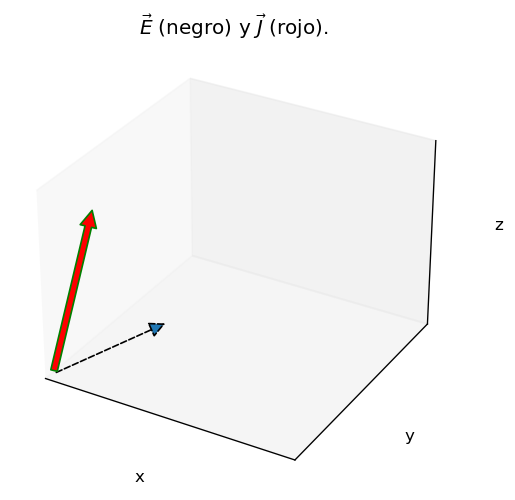

In [4]:
fig = plt.figure(dpi=120)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(0,2)
ax.arrow3D([0,0,0],
           E/max(np.abs(E)),
           mutation_scale=20,
           arrowstyle="-|>",
           linestyle='dashed')
ax.arrow3D([0,0,0],
           J/max(np.abs(J)),
           mutation_scale=20,
           ec ='green',
           fc='red')
ax.set_xlabel('x'); ax.set_xticks([])
ax.set_ylabel('y'); ax.set_yticks([])
ax.set_zlabel('z'); ax.set_zticks([])
fig.tight_layout()
_ = plt.title(r'$\vec{E}$ (negro) y $\vec{J}$ (rojo).')

End!